# **Customer Behaviour Analysis - App usage**

We have the App usage dataset for 10000 customers with the following colums.
1. Duration Used(days)- represents the number of days the customer has used the application. Has integer values
2. Total usage(minutes) - represents the total minutes the cutomer has spent on the application. Has integer values
3. Reason for quitting - tells why the cutomer has chosen to quit the app. Object type
4. Cost offered(rupees) - represents the amount offered to the customer. Has integer values
5. Accepted offer - represents whether the customer who chose to quit has accepted the above mentioned cost offer. Boolean values(True or false)

# **We predict the likelihood of offer acceptance**

we perform the following to achieve this.
*   Data collection - import the dataset
*   Data Preprocessing - clean the data, handle null values and categorise the data accordingly. Example apply one hot encoding to convert the object type to int(0/1) values.
*   Train the model
*   Evaluate the model





In [12]:
#import all the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [31]:
#load the dataset
data=pd.read_csv("/content/App Usage dataset for 10000 customers.csv")
df = pd.DataFrame(data)
df.head(20)

,Duration Used (days),Total Usage (minutes),Reason for Quitting,Cost Offered (rupees),Accepted Offer
0,141,3186,Expensive,600,True
1,154,9717,Not Useful,800,True
2,306,17820,Not Useful,500,True
3,338,28135,Expensive,500,True
4,57,5448,Expensive,800,True
5,144,5633,Expensive,800,False
6,80,5498,Not Useful,800,False
7,128,11665,Not Useful,600,True
8,177,5316,Unhappy,800,True
9,260,21373,Expensive,800,True


# EDA - Exploratory Data Analysis

In [32]:
#check for null values in the dataset
df.isnull().sum()

,0
Duration Used (days),0
Total Usage (minutes),0
Reason for Quitting,0
Cost Offered (rupees),0
Accepted Offer,0


In [33]:
df.describe()

,Duration Used (days),Total Usage (minutes),Cost Offered (rupees)
count,10000.000000,10000.000000,10000.000000
mean,182.427000,10933.038700,701.590000
std,105.569033,7964.150847,141.415953
min,1.000000,27.000000,500.000000
25%,90.000000,4459.750000,600.000000
50%,183.000000,9274.000000,700.000000
75%,274.000000,15929.000000,800.000000
max,365.000000,35952.000000,900.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Duration Used (days)   10000 non-null  int64 
 1   Total Usage (minutes)  10000 non-null  int64 
 2   Reason for Quitting    10000 non-null  object
 3   Cost Offered (rupees)  10000 non-null  int64 
 4   Accepted Offer         10000 non-null  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 322.4+ KB


We can visualize the distributions of numerical columns like Duration Used (days) and Total Usage (minutes) to understand their spread.

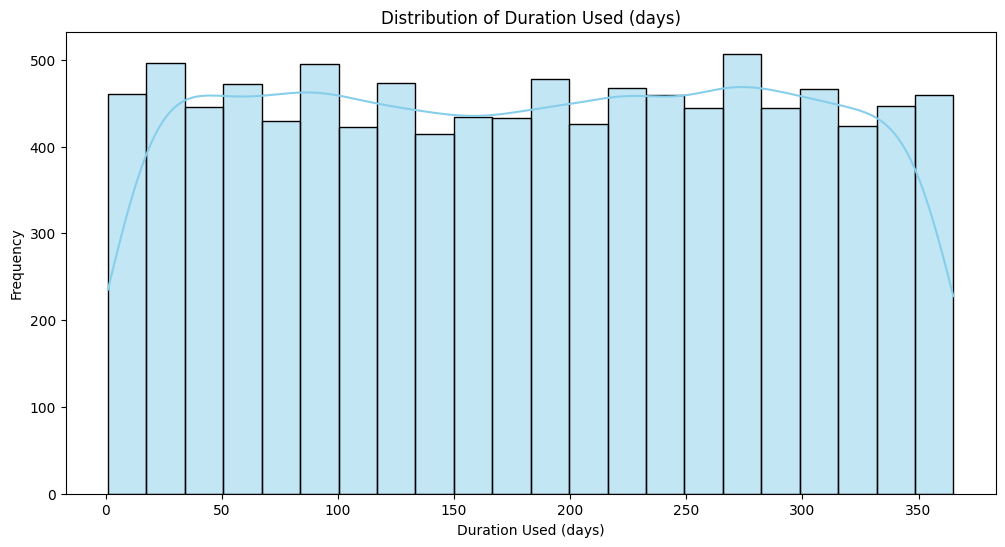

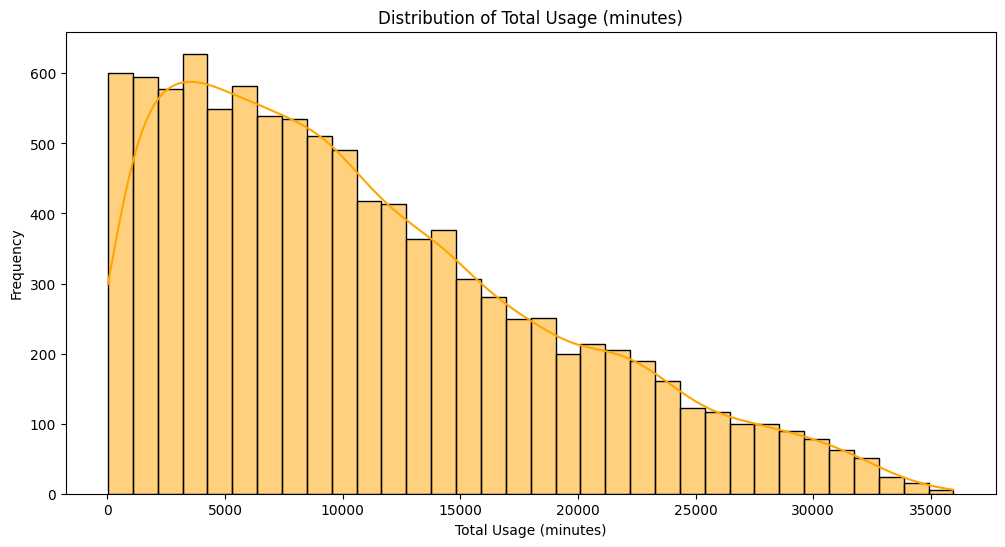

In [27]:
import seaborn as sns

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration Used (days)'], kde=True, color='skyblue')
plt.title('Distribution of Duration Used (days)')
plt.xlabel('Duration Used (days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Total Usage (minutes)'], kde=True, color='orange')
plt.title('Distribution of Total Usage (minutes)')
plt.xlabel('Total Usage (minutes)')
plt.ylabel('Frequency')
plt.show()


e will analyze the distribution of categorical variables like Reason for Quitting and Accepted Offer.

<ipython-input-35-14beabf92b08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Reason for Quitting', palette='Set2')


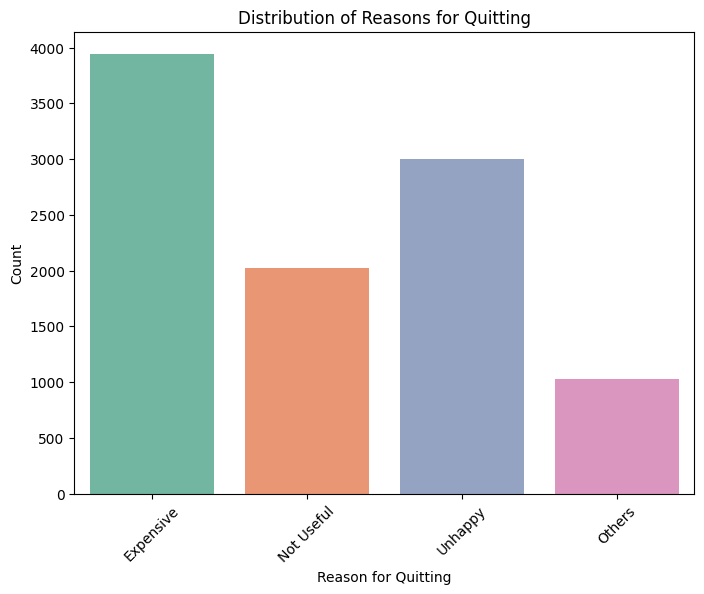

<ipython-input-35-14beabf92b08>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Accepted Offer', palette='Set1')


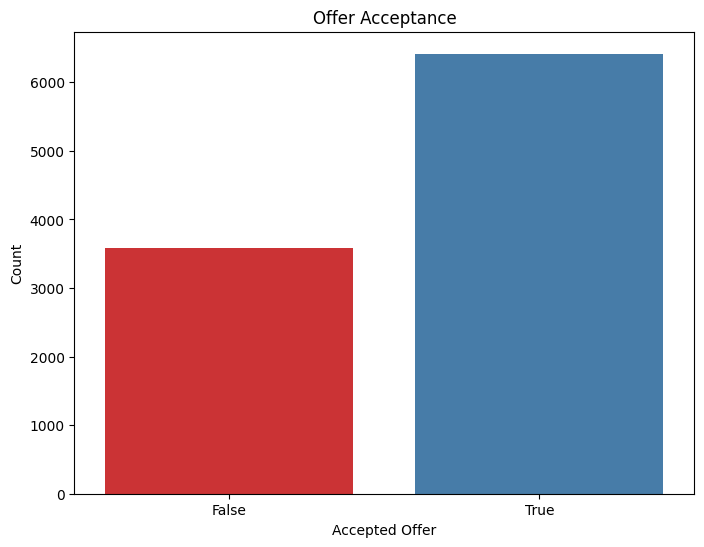

In [35]:
# Count plot for 'Reason for Quitting'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Reason for Quitting', palette='Set2')
plt.title('Distribution of Reasons for Quitting')
plt.xlabel('Reason for Quitting')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count plot for 'Accepted Offer'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Accepted Offer', palette='Set1')
plt.title('Offer Acceptance')
plt.xlabel('Accepted Offer')
plt.ylabel('Count')
plt.show()


If numerical features are correlated, heatmap helps understand relationships between features.

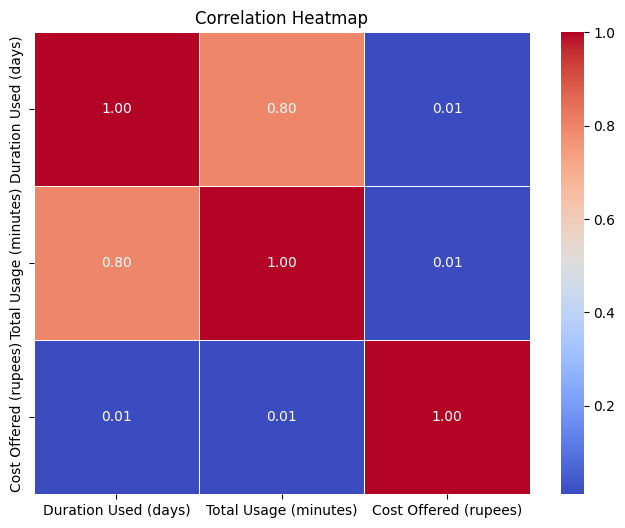

In [37]:
# Correlation Heatmap
corr = df[['Duration Used (days)', 'Total Usage (minutes)', 'Cost Offered (rupees)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
df = pd.DataFrame(data)
# Convert target variable to numeric (True = 1, False = 0)
df['Accepted Offer'] = df['Accepted Offer'].astype(int)

In [13]:
# Create a column transformer for preprocessing steps - OneHotEncoder for 'Reason for Quitting'
# StandardScaler for numerical columns (Duration, Total Usage, Cost Offered)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Duration Used (days)', 'Total Usage (minutes)', 'Cost Offered (rupees)']),
        ('cat', OneHotEncoder(), ['Reason for Quitting'])
    ])

In [15]:
#Split the Data into Training and Testing sets
X = df.drop('Accepted Offer', axis=1)  # Features
y = df['Accepted Offer']               # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% for testing and 80% for training.

#Apply preprocessing to training and test sets using a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data, and transform the test data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# We make use of logistic regression here.
Logistic Regression is a commonly used algorithm for binary classification problems (such as predicting whether a customer will accept or reject an offer).

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.678
Confusion Matrix:
[[ 244  462]
 [ 182 1112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.35      0.43       706
           1       0.71      0.86      0.78      1294

    accuracy                           0.68      2000
   macro avg       0.64      0.60      0.60      2000
weighted avg       0.66      0.68      0.65      2000



An accuracy of 0.678 means that 67.8% of the predictions made by the model are correct.


*   True Negatives (TN) = 244: These are the instances where the actual class was 0 (customer rejected the offer) and the model predicted 0.
*   False Positives (FP) = 462: These are the instances where the actual class was 0 (customer rejected the offer) but the model incorrectly predicted 1 (customer accepted the offer).

*  False Negatives (FN) = 182: These are the instances where the actual class was 1 (customer accepted the offer) but the model incorrectly predicted 0 (customer rejected the offer).
*   True Positives (TP) = 1112: These are the instances where the actual class was 1 (customer accepted the offer) and the model predicted 1.





We can use cross-validation to ensure the model's performance is consistent across different splits of the dataset and is not overfitting to a specific training set. This can help us determine whether the model is generalizing well.

In [21]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with Cross-Validation
log_reg_model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
cv_scores = cross_val_score(log_reg_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy Scores: [0.670625 0.681875 0.688125 0.67     0.68375 ]
Mean Cross-Validation Accuracy: 0.6788749999999999


The cross-validation results show that the Logistic Regression model achieves a stable average accuracy of 67.89%, with minor fluctuations across the 5 folds (67-69%). This indicates that the model generalizes reasonably well, but there is still room for improvement, particularly in predicting the minority class (rejected offers).


### **Conclusion on Likelihood of Offer Acceptance:**

Based on the Logistic Regression model, we can conclude that the model is moderately successful in predicting the likelihood of offer acceptance. The average accuracy of around 67.89% suggests that the model has a reasonable ability to identify whether a customer will accept or reject an offer. However, the performance is better at predicting offer acceptance (class 1) with a higher recall of 86%, but it struggles with predicting rejections (class 0), where the recall is only 35%.

This indicates an imbalance in the prediction for accepted vs. rejected offers, with the model being more biased toward predicting "accepted offers." To improve the model’s performance, especially in predicting rejections, techniques such as handling class imbalance could be applied.

# Price Range Analysis
This analysis helps in understanding the range of the cost the customer might accept.

data.describe() gave a brief overview on statistics like the min, max, mean, 25th percentile (Q1), 50th percentile (median or Q2), and 75th percentile (Q3) values, which can be used to determine a suitable price range for our analysis.i.e, Low Price (0-500)', 'Mid Price (500-800)', 'High Price (800-1000)

<ipython-input-26-5c3652ee61d3>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate = df.groupby('Price Range')['Accepted Offer'].mean()


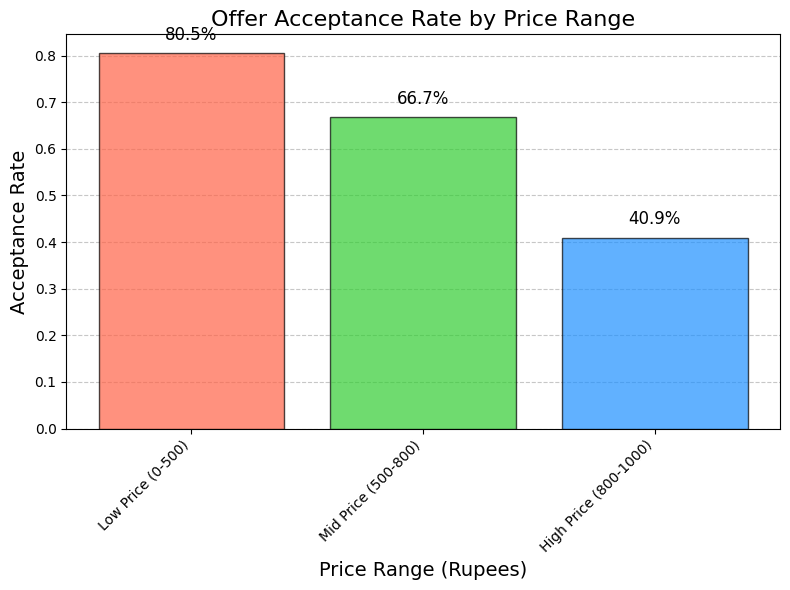

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# Create bins for cost offered
bins = [0, 500, 800, 1000]
labels = ['Low Price (0-500)', 'Mid Price (500-800)', 'High Price (800-1000)']
df['Price Range'] = pd.cut(df['Cost Offered (rupees)'], bins=bins, labels=labels)

#Calculate the acceptance rate for each price range
acceptance_rate = df.groupby('Price Range')['Accepted Offer'].mean()

#Plot
plt.figure(figsize=(8, 6))
colors = ['#FF6347', '#32CD32', '#1E90FF']
bars = plt.bar(acceptance_rate.index, acceptance_rate.values, color=colors, alpha=0.7, edgecolor='black')
for bar in bars:
    bar.set_zorder(3)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{bar.get_height()*100:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Offer Acceptance Rate by Price Range', fontsize=16)
plt.xlabel('Price Range (Rupees)', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()


The analysis shows that the **Low Price** range (0-500 rupees) has the highest acceptance rate at **80.5%**, indicating customers are more likely to accept lower-priced offers. The **Mid Price** range (500-800 rupees) follows with a **66.7%** acceptance rate, while the **High Price** range (800-1000 rupees) has the lowest at **40.9%**, suggesting that higher prices lead to lower offer acceptance.